# Vanguard A/B Test Analysis - Day 1-2: EDA & Data Cleaning

## Objectives
- Load and merge datasets
- Perform data cleaning
- Answer demographic questions:
  - Who are the primary clients?
  - Are they younger or older?
  - Are they new or long-standing clients?
- Conduct client behavior analysis

## 1. Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 2. Load Datasets

In [33]:
# Load client demographics
df_demo = pd.read_csv('../data/df_final_demo.txt', sep=',')
print(f"Demographics dataset: {df_demo.shape}")

# Load experiment roster
df_experiment = pd.read_csv('../data/df_final_experiment_clients.txt', sep='\t')
print(f"Experiment dataset: {df_experiment.shape}")

# Load web data parts
df_web_pt1 = pd.read_csv('../data/df_final_web_data_pt_1.txt', sep=',')
df_web_pt2 = pd.read_csv('../data/df_final_web_data_pt_2.txt', sep=',')
print(f"Web data pt1: {df_web_pt1.shape}")
print(f"Web data pt2: {df_web_pt2.shape}")

# Merge web data parts
df_web = pd.concat([df_web_pt1, df_web_pt2], axis=0, ignore_index=True)
print(f"\nMerged web data: {df_web.shape}")

print("\n✅ All datasets loaded successfully")

Demographics dataset: (70609, 9)
Experiment dataset: (70609, 1)
Web data pt1: (343141, 5)
Web data pt2: (412264, 5)

Merged web data: (755405, 5)

✅ All datasets loaded successfully


## 3. Initial Data Exploration

### 3.1 Demographics Dataset

In [34]:
print("=== DEMOGRAPHICS DATASET ===")
print(f"\nShape: {df_demo.shape}")
print(f"\nColumns: {df_demo.columns.tolist()}")
print(f"\nData types:\n{df_demo.dtypes}")
print(f"\nFirst few rows:")
df_demo.head()

=== DEMOGRAPHICS DATASET ===

Shape: (70609, 9)

Columns: ['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

Data types:
client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                   str
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

First few rows:


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [35]:
# Basic statistics
df_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [36]:
# Check for missing values
print("Missing values in demographics:")
df_demo.isnull().sum()

Missing values in demographics:


client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

### 3.2 Experiment Dataset

In [37]:
print("=== EXPERIMENT DATASET ===")
print(f"\nShape: {df_experiment.shape}")
print(f"\nColumns: {df_experiment.columns.tolist()}")
print(f"\nData types:\n{df_experiment.dtypes}")
print(f"\nFirst few rows:")
df_experiment.head()

=== EXPERIMENT DATASET ===

Shape: (70609, 1)

Columns: ['client_id,Variation']

Data types:
client_id,Variation    str
dtype: object

First few rows:


,"client_id,Variation"
0,"9988021,Test"
1,"8320017,Test"
2,"4033851,Control"
3,"1982004,Test"
4,"9294070,Control"


In [38]:
# Check the actual column names
print("Experiment columns:", df_experiment.columns.tolist())

Experiment columns: ['client_id,Variation']


In [39]:
# Check experiment groups
print("Variation distribution:")
df_experiment = pd.read_csv('../data/df_final_experiment_clients.txt', sep=',')
print(f"\nPercentages:")
print(df_experiment['Variation'].value_counts(normalize=True) * 100)

Variation distribution:

Percentages:
Variation
Test       53.40198
Control    46.59802
Name: proportion, dtype: float64


### 3.3 Web Data Dataset

In [40]:
print("=== WEB DATA DATASET ===")
print(f"\nShape: {df_web.shape}")
print(f"\nColumns: {df_web.columns.tolist()}")
print(f"\nData types:\n{df_web.dtypes}")
print(f"\nFirst few rows:")
df_web.head()

=== WEB DATA DATASET ===

Shape: (755405, 5)

Columns: ['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time']

Data types:
client_id       int64
visitor_id        str
visit_id          str
process_step      str
date_time         str
dtype: object

First few rows:


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [41]:
# Check process steps
print("Process steps:")
print(df_web['process_step'].value_counts().sort_index())

Process steps:
process_step
confirm    102963
start      243945
step_1     163193
step_2     133062
step_3     112242
Name: count, dtype: int64


In [42]:
# Check missing values
print("Missing values in web data:")
df_web.isnull().sum()

Missing values in web data:


client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

## 4. Data Cleaning

### 4.1 Check for Duplicates

In [43]:
print("Duplicates check:")
print(f"Demographics duplicates: {df_demo.duplicated().sum()}")
print(f"Experiment duplicates: {df_experiment.duplicated().sum()}")
print(f"Web data duplicates: {df_web.duplicated().sum()}")

Duplicates check:
Demographics duplicates: 0
Experiment duplicates: 0
Web data duplicates: 10764


### 4.2 Handle Missing Values

In [44]:
# Examine missing values more closely
print("Missing value percentages:")
print("\nDemographics:")
print((df_demo.isnull().sum() / len(df_demo)) * 100)

print("\nWeb data:")
print((df_web.isnull().sum() / len(df_web)) * 100)

Missing value percentages:

Demographics:
client_id           0.000000
clnt_tenure_yr      0.019828
clnt_tenure_mnth    0.019828
clnt_age            0.021244
gendr               0.019828
num_accts           0.019828
bal                 0.019828
calls_6_mnth        0.019828
logons_6_mnth       0.019828
dtype: float64

Web data:
client_id       0.0
visitor_id      0.0
visit_id        0.0
process_step    0.0
date_time       0.0
dtype: float64


In [45]:
# Decision on handling missing values
# TODO: Based on the percentages above, decide how to handle missing values
# Options: drop, fill with mean/median, leave as is, etc.

# Example approach (modify as needed):
# For now, we'll keep all rows but be aware of missing values in analysis

### 4.3 Convert Data Types

In [46]:
# Convert date_time to datetime
df_web['date_time'] = pd.to_datetime(df_web['date_time'])
print("✅ Converted date_time to datetime format")

# Verify
print(f"Date range: {df_web['date_time'].min()} to {df_web['date_time'].max()}")

✅ Converted date_time to datetime format
Date range: 2017-03-15 00:03:03 to 2017-06-20 23:59:57


In [47]:
print("Demo columns:", df_demo.columns.tolist())

Demo columns: ['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']


### 4.4 Check for Outliers/Anomalies

In [48]:
# Check age distribution
print("Age statistics:")
print(df_demo['clnt_age'].describe())

# Check for unusual values
print(f"\nAny ages < 18? {(df_demo['clnt_age'] < 18).sum()}")
print(f"Any ages > 100? {(df_demo['clnt_age'] > 100).sum()}")

Age statistics:
count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: clnt_age, dtype: float64

Any ages < 18? 374
Any ages > 100? 0


In [49]:
# Check balance for anomalies
print("Balance statistics:")
print(df_demo['bal'].describe())

print(f"\nAny negative balances? {(df_demo['bal'] < 0).sum()}")

Balance statistics:
count    7.059500e+04
mean     1.474452e+05
std      3.015087e+05
min      1.378942e+04
25%      3.734683e+04
50%      6.333290e+04
75%      1.375449e+05
max      1.632004e+07
Name: bal, dtype: float64

Any negative balances? 0


## 5. Merge Datasets for Analysis

In [50]:
# Merge web data with experiment data to get variation info
df_web_experiment = df_web.merge(df_experiment, on='client_id', how='left')
print(f"Web + Experiment shape: {df_web_experiment.shape}")

# Merge with demographics
df_full = df_web_experiment.merge(df_demo, on='client_id', how='left')
print(f"Full dataset shape: {df_full.shape}")

print("\n✅ Datasets merged successfully")

Web + Experiment shape: (755405, 6)
Full dataset shape: (755405, 14)

✅ Datasets merged successfully


In [51]:
# Preview merged dataset
df_full.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0


## 6. Demographic Analysis

### 6.1 Who are the primary clients?

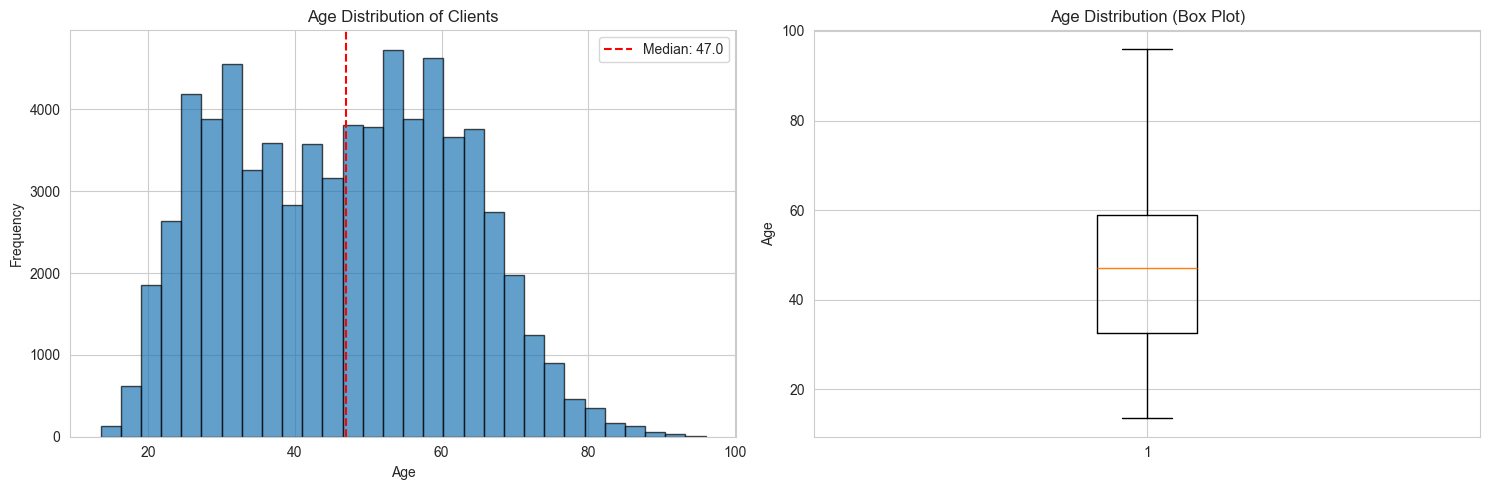

Mean age: 46.4
Median age: 47.0
Mode age: 58.5


In [52]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_demo['clnt_age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution of Clients')
axes[0].axvline(df_demo['clnt_age'].median(), color='red', linestyle='--', label=f"Median: {df_demo['clnt_age'].median():.1f}")
axes[0].legend()

# Box plot
axes[1].boxplot(df_demo['clnt_age'].dropna(), vert=True)
axes[1].set_ylabel('Age')
axes[1].set_title('Age Distribution (Box Plot)')

plt.tight_layout()
plt.show()

print(f"Mean age: {df_demo['clnt_age'].mean():.1f}")
print(f"Median age: {df_demo['clnt_age'].median():.1f}")
print(f"Mode age: {df_demo['clnt_age'].mode()[0]:.1f}")

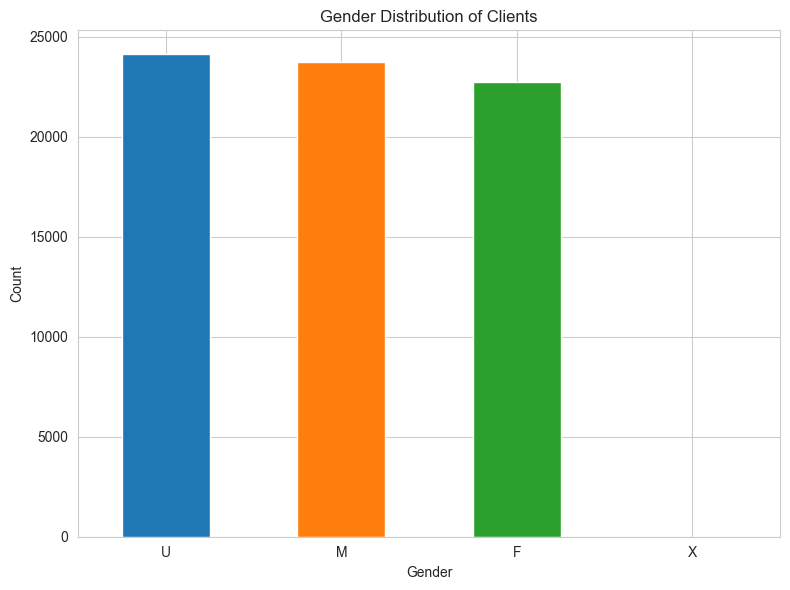


Gender distribution:
gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

Percentages:
gendr
U    34.169559
M    33.605779
F    32.220412
X     0.004250
Name: count, dtype: float64


In [53]:
# Gender distribution
gender_counts = df_demo['gendr'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Gender Distribution of Clients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nGender distribution:")
print(gender_counts)
print(f"\nPercentages:")
print((gender_counts / gender_counts.sum()) * 100)

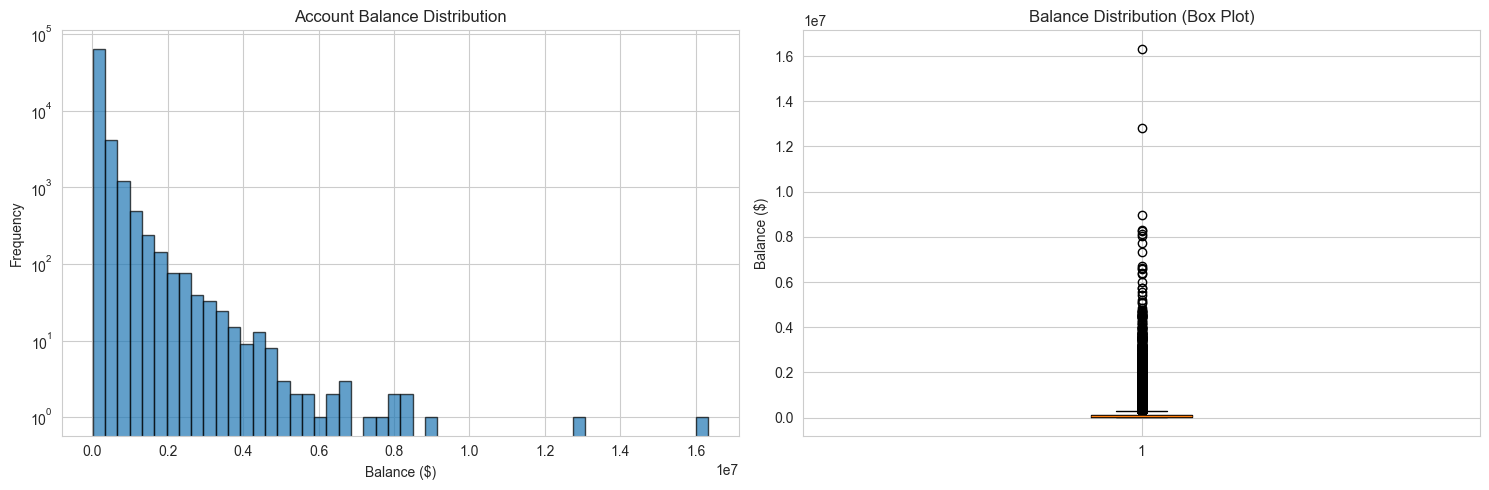

Mean balance: $147,445.24
Median balance: $63,332.90


In [54]:
# Account balance distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram (log scale due to wide range)
axes[0].hist(df_demo['bal'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Balance ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Account Balance Distribution')
axes[0].set_yscale('log')

# Box plot
axes[1].boxplot(df_demo['bal'].dropna(), vert=True)
axes[1].set_ylabel('Balance ($)')
axes[1].set_title('Balance Distribution (Box Plot)')

plt.tight_layout()
plt.show()

print(f"Mean balance: ${df_demo['bal'].mean():,.2f}")
print(f"Median balance: ${df_demo['bal'].median():,.2f}")

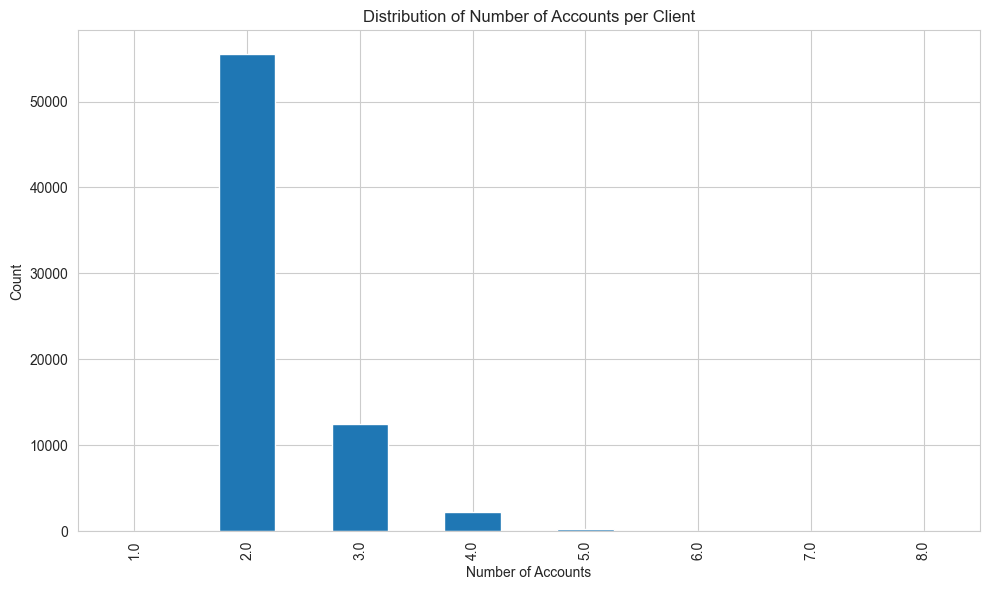

Mean number of accounts: 2.26
Median number of accounts: 2


In [55]:
# Number of accounts
plt.figure(figsize=(10, 6))
df_demo['num_accts'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Accounts per Client')
plt.xlabel('Number of Accounts')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print(f"Mean number of accounts: {df_demo['num_accts'].mean():.2f}")
print(f"Median number of accounts: {df_demo['num_accts'].median():.0f}")

### 6.2 Are clients younger or older?

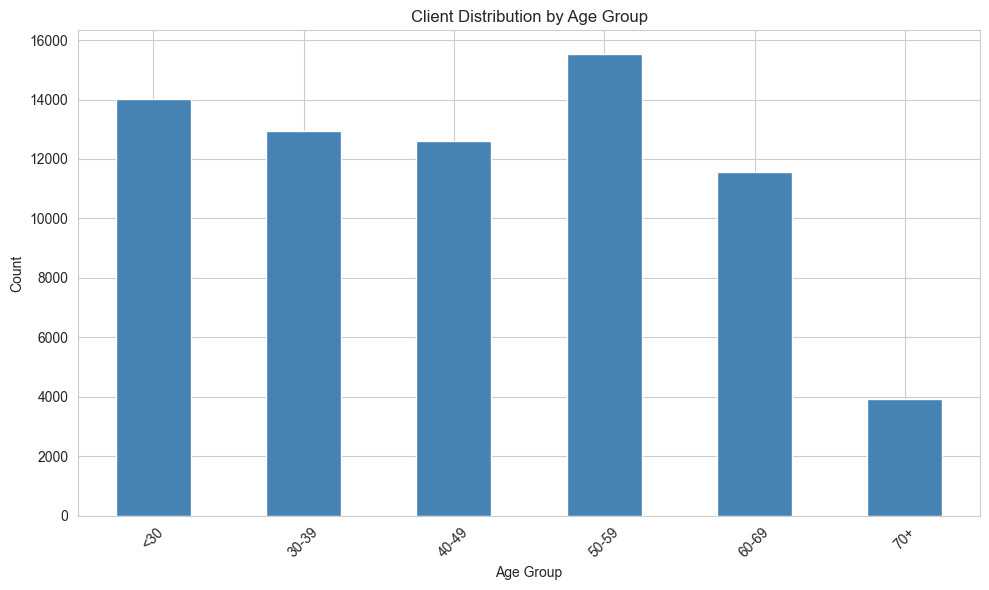

Age group distribution:
age_group
<30      14024
30-39    12930
40-49    12590
50-59    15549
60-69    11571
70+       3930
Name: count, dtype: int64

Percentages:
age_group
<30      19.865711
30-39    18.316004
40-49    17.834377
50-59    22.025951
60-69    16.390911
70+       5.567045
Name: count, dtype: float64


In [56]:
# Create age groups
df_demo['age_group'] = pd.cut(df_demo['clnt_age'], 
                               bins=[0, 30, 40, 50, 60, 70, 100], 
                               labels=['<30', '30-39', '40-49', '50-59', '60-69', '70+'])

# Age group distribution
age_group_counts = df_demo['age_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='steelblue')
plt.title('Client Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Age group distribution:")
print(age_group_counts)
print(f"\nPercentages:")
print((age_group_counts / age_group_counts.sum()) * 100)

### 6.3 Are clients new or long-standing?

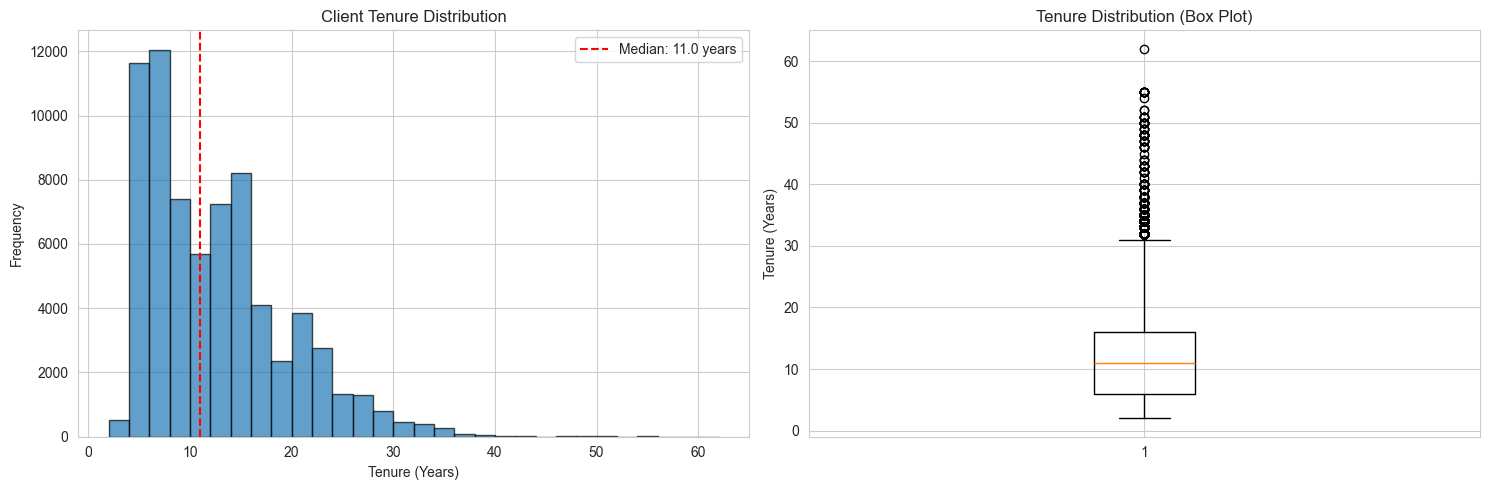

Mean tenure: 12.1 years
Median tenure: 11.0 years


In [57]:
# Tenure distribution (in years)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_demo['clnt_tenure_yr'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Tenure (Years)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Client Tenure Distribution')
axes[0].axvline(df_demo['clnt_tenure_yr'].median(), color='red', linestyle='--', 
               label=f"Median: {df_demo['clnt_tenure_yr'].median():.1f} years")
axes[0].legend()

# Box plot
axes[1].boxplot(df_demo['clnt_tenure_yr'].dropna(), vert=True)
axes[1].set_ylabel('Tenure (Years)')
axes[1].set_title('Tenure Distribution (Box Plot)')

plt.tight_layout()
plt.show()

print(f"Mean tenure: {df_demo['clnt_tenure_yr'].mean():.1f} years")
print(f"Median tenure: {df_demo['clnt_tenure_yr'].median():.1f} years")

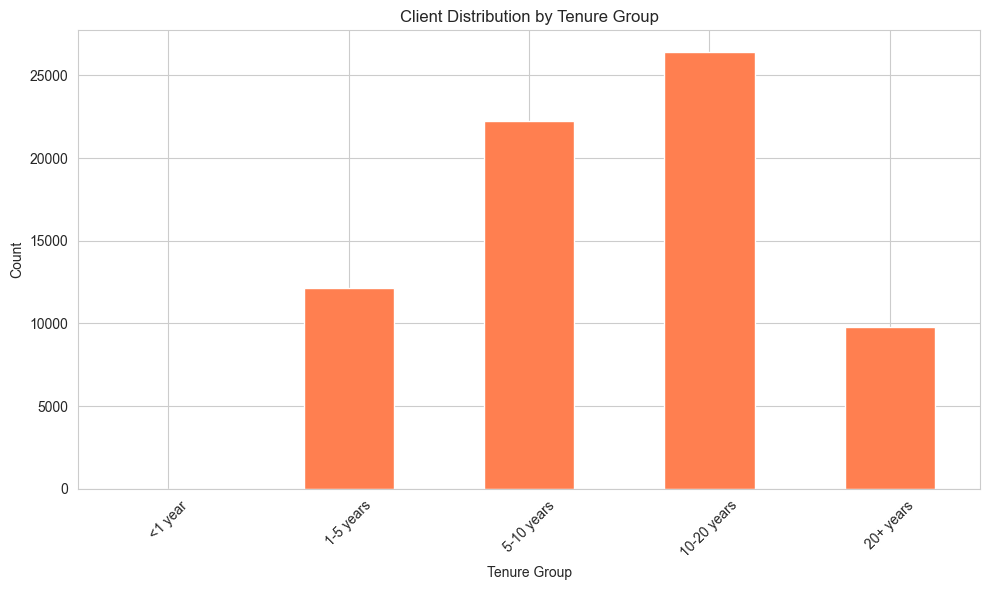

Tenure group distribution:
tenure_group
<1 year            0
1-5 years      12172
5-10 years     22224
10-20 years    26394
20+ years       9805
Name: count, dtype: int64

Percentages:
tenure_group
<1 year         0.000000
1-5 years      17.242014
5-10 years     31.480983
10-20 years    37.387917
20+ years      13.889086
Name: count, dtype: float64


In [58]:
# Create tenure groups
df_demo['tenure_group'] = pd.cut(df_demo['clnt_tenure_yr'], 
                                  bins=[-1, 1, 5, 10, 20, 100], 
                                  labels=['<1 year', '1-5 years', '5-10 years', '10-20 years', '20+ years'])

tenure_group_counts = df_demo['tenure_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
tenure_group_counts.plot(kind='bar', color='coral')
plt.title('Client Distribution by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Tenure group distribution:")
print(tenure_group_counts)
print(f"\nPercentages:")
print((tenure_group_counts / tenure_group_counts.sum()) * 100)

## 7. Client Behavior Analysis

### 7.1 Process Completion Analysis

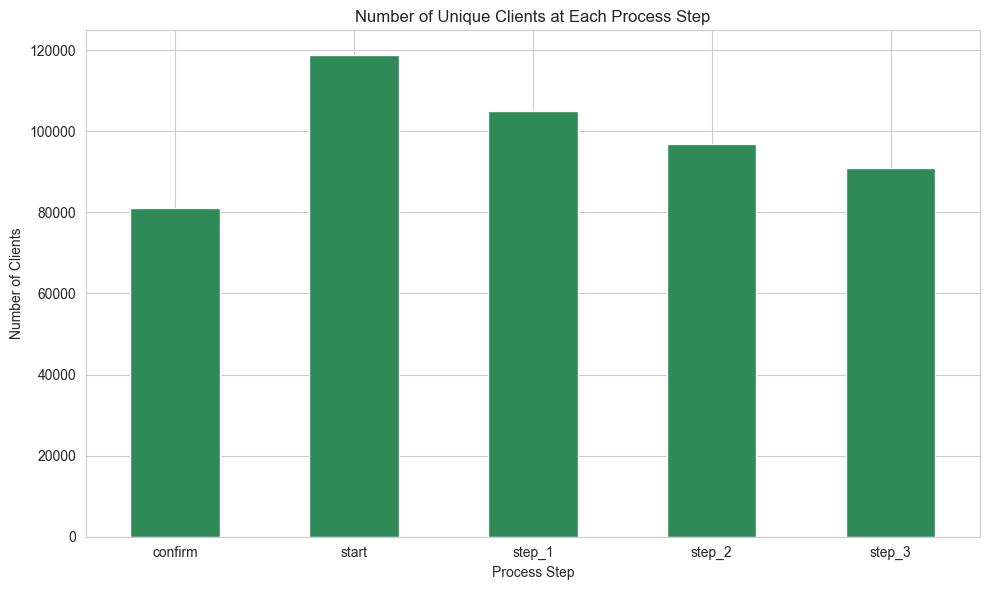

Clients at each step:
process_step
confirm     81145
start      118980
step_1     104978
step_2      96943
step_3      91076
Name: client_id, dtype: int64

Drop-off from each step:
confirm → start: -37835 clients (-46.6%)
start → step_1: 14002 clients (11.8%)
step_1 → step_2: 8035 clients (7.7%)
step_2 → step_3: 5867 clients (6.1%)


In [59]:
# How many unique clients reached each step?
step_completion = df_web.groupby('process_step')['client_id'].nunique().sort_index()

plt.figure(figsize=(10, 6))
step_completion.plot(kind='bar', color='seagreen')
plt.title('Number of Unique Clients at Each Process Step')
plt.xlabel('Process Step')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Clients at each step:")
print(step_completion)

# Calculate drop-off rate
print("\nDrop-off from each step:")
for i in range(len(step_completion)-1):
    current_step = step_completion.index[i]
    next_step = step_completion.index[i+1]
    drop_off = step_completion.iloc[i] - step_completion.iloc[i+1]
    drop_off_pct = (drop_off / step_completion.iloc[i]) * 100
    print(f"{current_step} → {next_step}: {drop_off} clients ({drop_off_pct:.1f}%)")

In [60]:
# Overall completion rate
total_clients = df_web['client_id'].nunique()
confirmed_clients = df_web[df_web['process_step'] == 'confirm']['client_id'].nunique()
completion_rate = (confirmed_clients / total_clients) * 100

print(f"Total clients in process: {total_clients}")
print(f"Clients who reached confirm: {confirmed_clients}")
print(f"Overall completion rate: {completion_rate:.2f}%")

Total clients in process: 120157
Clients who reached confirm: 81145
Overall completion rate: 67.53%


### 7.2 Engagement Patterns

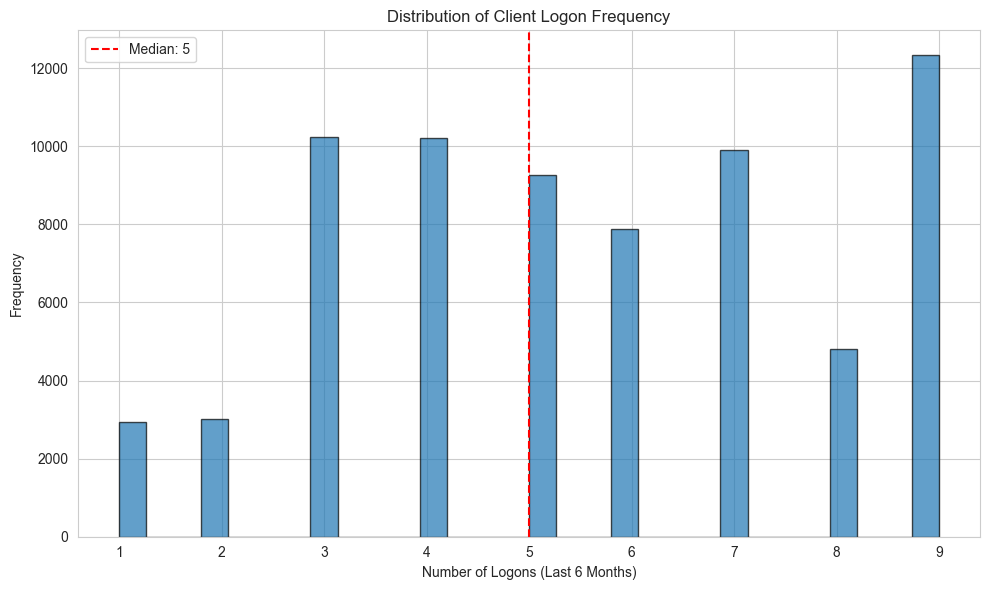

Mean logons: 5.6
Median logons: 5


In [61]:
# Logon frequency
plt.figure(figsize=(10, 6))
df_demo['logons_6_mnth'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Logons (Last 6 Months)')
plt.ylabel('Frequency')
plt.title('Distribution of Client Logon Frequency')
plt.axvline(df_demo['logons_6_mnth'].median(), color='red', linestyle='--', 
           label=f"Median: {df_demo['logons_6_mnth'].median():.0f}")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Mean logons: {df_demo['logons_6_mnth'].mean():.1f}")
print(f"Median logons: {df_demo['logons_6_mnth'].median():.0f}")

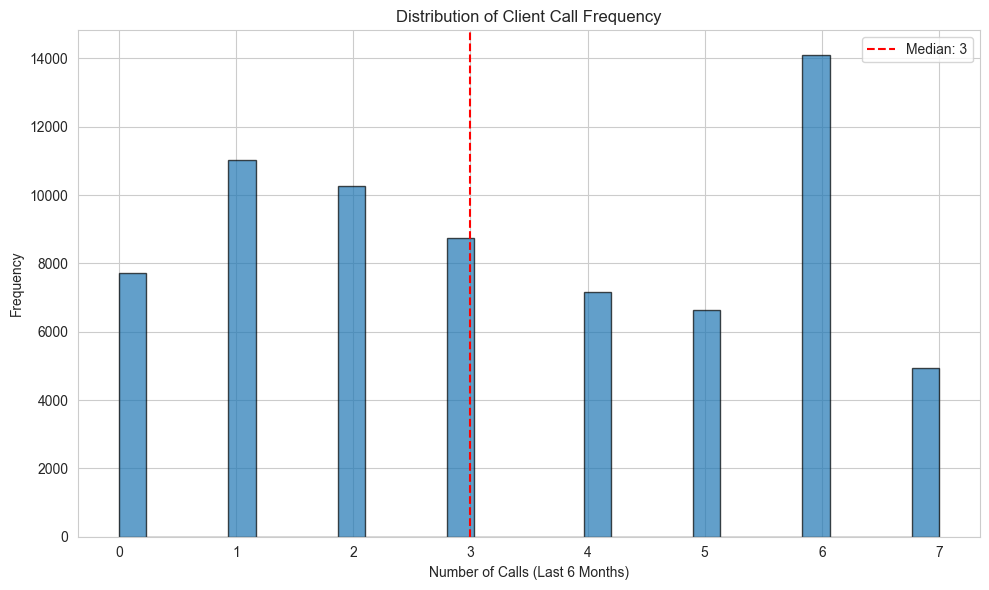

Mean calls: 3.4
Median calls: 3


In [62]:
# Call frequency
plt.figure(figsize=(10, 6))
df_demo['calls_6_mnth'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Calls (Last 6 Months)')
plt.ylabel('Frequency')
plt.title('Distribution of Client Call Frequency')
plt.axvline(df_demo['calls_6_mnth'].median(), color='red', linestyle='--', 
           label=f"Median: {df_demo['calls_6_mnth'].median():.0f}")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Mean calls: {df_demo['calls_6_mnth'].mean():.1f}")
print(f"Median calls: {df_demo['calls_6_mnth'].median():.0f}")

### 7.3 Time-based Patterns

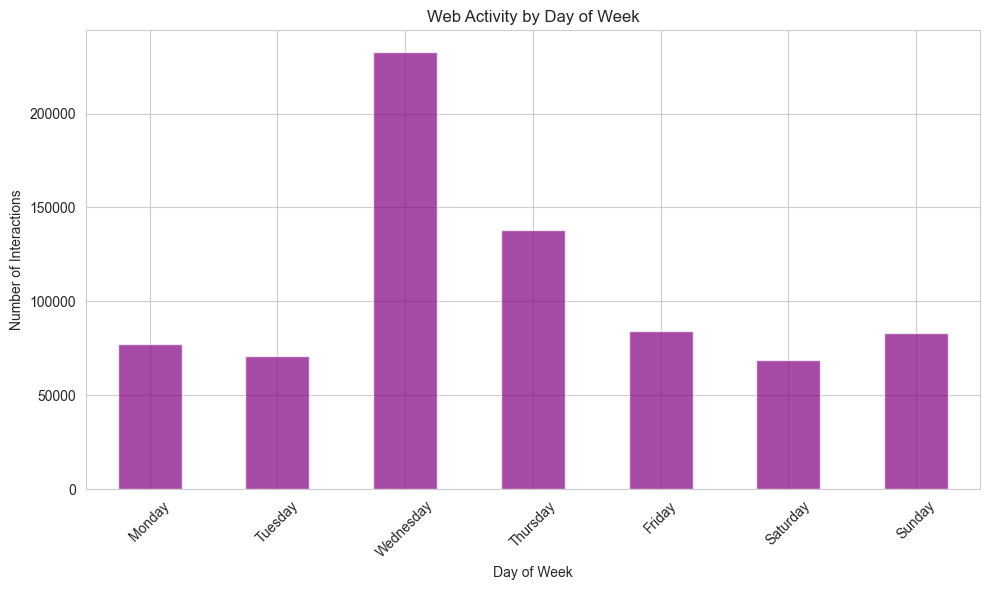

In [63]:
# Activity by day of week
df_web['day_of_week'] = df_web['date_time'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
df_web['day_of_week'].value_counts()[day_order].plot(kind='bar', color='purple', alpha=0.7)
plt.title('Web Activity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

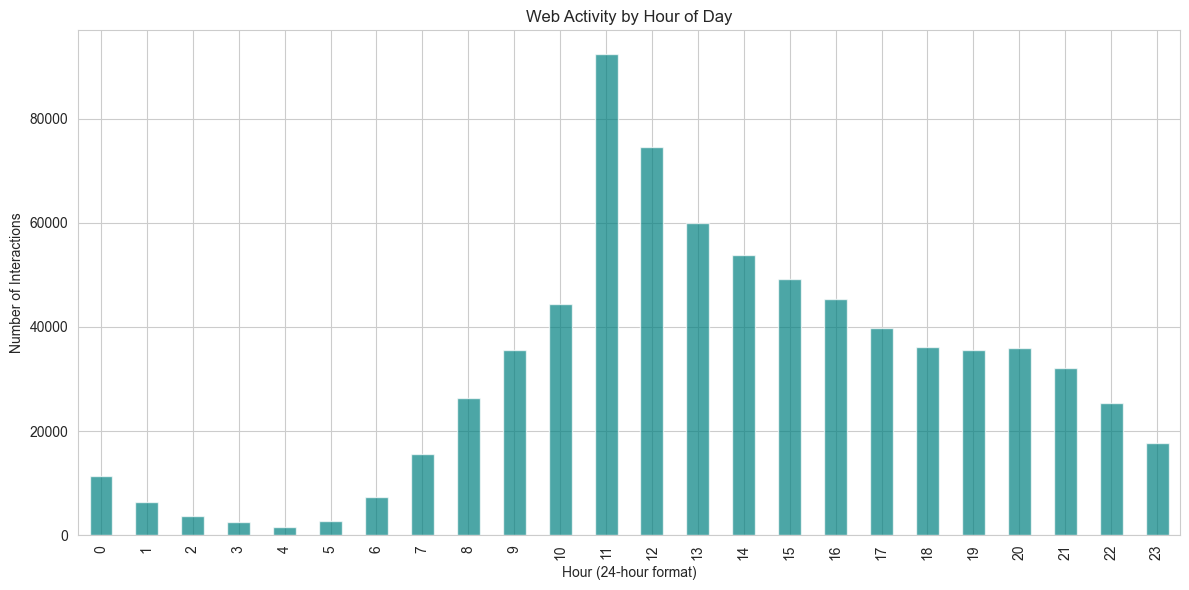

In [64]:
# Activity by hour of day
df_web['hour'] = df_web['date_time'].dt.hour

plt.figure(figsize=(12, 6))
df_web['hour'].value_counts().sort_index().plot(kind='bar', color='teal', alpha=0.7)
plt.title('Web Activity by Hour of Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Interactions')
plt.tight_layout()
plt.show()

## 8. Summary of Key Findings

### Demographics:
- TODO: Fill in based on your analysis above
- Primary client age range: [fill in]
- Gender distribution: [fill in]
- Typical tenure: [fill in]

### Behavior:
- TODO: Fill in based on your analysis
- Overall completion rate: [fill in]
- Biggest drop-off occurs: [fill in]
- Peak activity times: [fill in]

## 9. Next Steps

- [ ] Review data cleaning decisions with partner
- [ ] Add any additional demographic visualizations needed
- [ ] Explore additional behavior patterns
- [ ] Prepare for Day 3: Performance Metrics (completion rates, time spent, error rates)
- [ ] Document key findings for presentation

## 10. Save Cleaned Data (Optional)

In [65]:
# Optionally save cleaned/merged datasets for later use
# df_full.to_csv('../data/cleaned_full_dataset.csv', index=False)
# print("✅ Cleaned data saved")